# Model Training

## 1.1 Import Data and Required Packages

- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [71]:

# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Import the CSV Data as Pandas DataFrame

df = pd.read_csv("data\housing.csv")

In [73]:
# Show Top 5 Records

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.01445,452600.0,NEAR BAY
1,-122.22,37.86,21.0,5682.5,1106.0,2401.0,1090.0,8.01445,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.25740,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64310,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.84620,342200.0,NEAR BAY


In [74]:
# Preparing X and Y variables

X = df.drop(columns=['median_house_value'],axis=1)

In [75]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.01445,NEAR BAY
1,-122.22,37.86,21.0,5682.5,1106.0,2401.0,1090.0,8.01445,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.25740,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64310,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.84620,NEAR BAY


In [76]:
y = df['median_house_value']

In [77]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [78]:
print("Categories in 'ocean_proximity' variable:     ",end=" " )
print(df['ocean_proximity'].unique())

Categories in 'ocean_proximity' variable:      ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [79]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [80]:
X = preprocessor.fit_transform(X)

In [81]:
X.shape

(20433, 13)

In [82]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20428     78100.0
20429     77100.0
20430     92300.0
20431     84700.0
20432     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [83]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((16346, 13), (4087, 13))

### Create an Evaluate Function to give all metrics after model Training


In [84]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [85]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 64946.1900
- Mean Absolute Error: 48175.4716
- R2 Score: 0.6690
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 66309.7505
- Mean Absolute Error: 49228.0194
- R2 Score: 0.6661


Lasso
Model performance for Training set
- Root Mean Squared Error: 64946.2328
- Mean Absolute Error: 48175.8779
- R2 Score: 0.6690
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 66303.8600
- Mean Absolute Error: 49225.5279
- R2 Score: 0.6662


Ridge
Model performance for Training set
- Root Mean Squared Error: 64949.0262
- Mean Absolute Error: 48179.7079
- R2 Score: 0.6689
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 66267.4333
- Mean Absolute Error: 49207.8203
- R2 Score: 0.6665


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 48194.2449
- Mean Absolute Erro

### Results

In [86]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.839870
5,Random Forest Regressor,0.825753
6,XGBRegressor,0.825364
3,K-Neighbors Regressor,0.715316
4,Decision Tree,0.668846
2,Ridge,0.666541
1,Lasso,0.666174
0,Linear Regression,0.666115
8,AdaBoost Regressor,0.416244


# CatBoosting Regressor

In [87]:
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the CatBoost model is %.2f" % score)

Accuracy of the CatBoost model is 84.43


### Plot y_pred and y_test

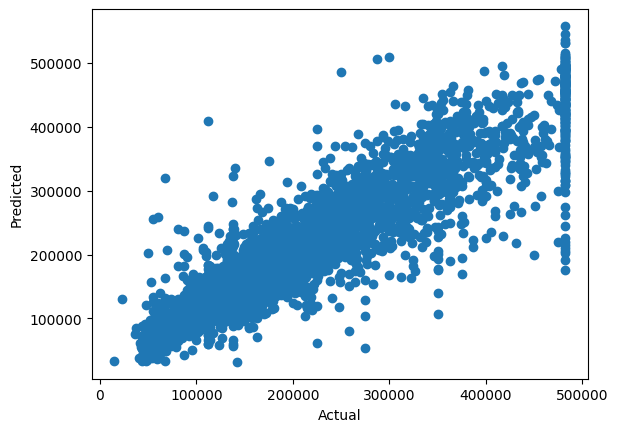

In [88]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

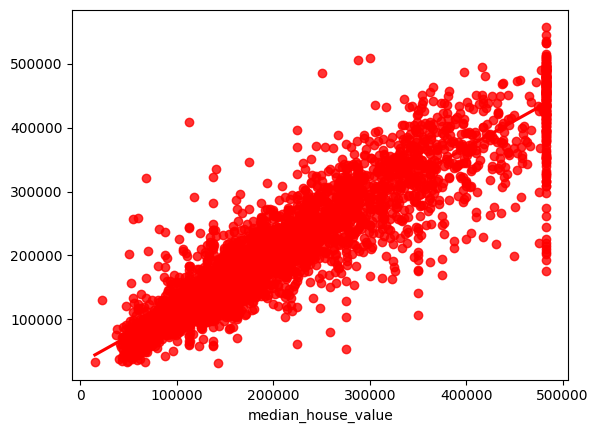

In [89]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [90]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
14278,245800.0,222064.194817,23735.805183
16224,137900.0,143842.917212,-5942.917212
7646,218200.0,198492.285023,19707.714977
1402,220800.0,146551.545222,74248.454778
1328,170500.0,146241.408055,24258.591945
...,...,...,...
8204,482500.0,371959.150275,110540.849725
6206,157900.0,156591.306261,1308.693739
2974,100200.0,92499.562137,7700.437863
13314,127700.0,107720.701464,19979.298536
